# Synthetic Data Project
## Sponsored by Bob Gradeck of the Western PA Regional Center
### Declan Kelly, Andrew Fox, Jack Kaye
## Project Objective
To analyze synthetic data and understand the protections it provides for privacy and the different limitations it has.
We will work to answer the following questions:
1. What type of conclusions can you draw from the synthetic dataset that was not available from the aggregate count data? 
2. How consistent are the aggregates from synthetic data with those reported by the county?
3. What is the underlying procedure for generating the synthetic datasets? 
4. Are you convinced of its utility and privacy guarantees that it provide to individuals?

In [1]:
# Loading in all necessary packages
import pandas as pd
import math
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from faker import Faker
fake = Faker()

## Cleaning, importing, and setting up the data


In [2]:
synthetic = '../../data-for-good/Project1/211_ServiceRequests.csv'
df_ServiceRequests = pd.read_csv(synthetic, usecols = ['_id','contact_date','gender','age_range', 'zip_code','county','state','needs_category', 'needs_code','level_1_classification','level_2_classification'])
df_ServiceRequests.head()
# could not use too big, would not let me push

C:\Users\decla\AppData\Local\Temp\ipykernel_1892\2748488748.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ServiceRequests = pd.read_csv(synthetic, usecols = ['_id','contact_date','gender','age_range', 'zip_code','county','state','needs_category', 'needs_code','level_1_classification','level_2_classification'])


,_id,contact_date,gender,age_range,zip_code,county,state,needs_category,needs_code,level_1_classification,level_2_classification
0,1,2020-01-01,NaN,NaN,15212,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food
1,2,2020-01-01,F,65 and over,15221,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food
2,3,2020-01-01,F,NaN,15226,Allegheny County,Pennsylvania,Food Pantries,BD-1800.2000,Basic Needs,Food
3,4,2020-01-01,M,25 to 44,15132,Allegheny County,Pennsylvania,Soup Kitchens,BD-5000.8300,Basic Needs,Food
4,5,2020-01-01,F,25 to 44,15221,Allegheny County,Pennsylvania,Soup Kitchens,BD-5000.8300,Basic Needs,Food


In [3]:
# Municipality Data
Municipality = '../../data-for-good/Project1/Municipality_Profiles.csv'
df_Municipality = pd.read_csv(Municipality, usecols = ['_id','metric_name','report_group','calendar_year', 'kpi_count','geo_area_name','population_name', 'kpi_population'])
df_Municipality

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
0,559714,Overdoses,Community Trends,2017.0,NaN,Aleppo,Total Population,1849.0
1,559715,Overdoses,Community Trends,2018.0,NaN,Aleppo,Total Population,1849.0
2,559716,Overdoses,Community Trends,2019.0,NaN,Aleppo,Total Population,1849.0
3,559717,Overdoses,Community Trends,2020.0,NaN,Aleppo,Total Population,1849.0
4,559718,Overdoses,Community Trends,2021.0,NaN,Aleppo,Total Population,1849.0
...,...,...,...,...,...,...,...,...
17288,577002,Older Adults Receiving Services,Population Served by DHS,2019.0,511.0,X-Unassigned,Adults 60 and Over,NaN
17289,577003,Older Adults Receiving Services,Population Served by DHS,2020.0,313.0,X-Unassigned,Adults 60 and Over,NaN
17290,577004,Older Adults Receiving Services,Population Served by DHS,2021.0,258.0,X-Unassigned,Adults 60 and Over,NaN
17291,577005,Older Adults Receiving Services,Population Served by DHS,2022.0,282.0,X-Unassigned,Adults 60 and Over,NaN


In [4]:
ServiceRecords = '../../data-for-good/Project1/ServiceRecords_SyntheticData.csv'
df_ServiceRecordsSynthetic = pd.read_csv(ServiceRecords, usecols = ['MCI_UNIQ_ID','CALDR_YR','DATE_OF_EVENT','service','GEO_AREA','age','DOB','DOD','GENDER','RACE','ETHNICITY'])
#df_ServiceRecordsSynthetic = pd.read_csv(ServiceRecords, usecols = ['MCI_UNIQ_ID','CALDR_YR','DATE_OF_EVENT','service', 'GEO_AREA','age','DOB','DOD', 'GENDER','RACE','ETHNICITY'])
df_ServiceRecordsSynthetic.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY
0,1626,2021,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
1,1626,2021,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
2,1626,2021,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
3,1626,2021,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
4,1626,2021,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown


In [5]:
# Getting Info on data - doesn't really help with Service requests since not continuous
df_ServiceRequests.describe()

,_id
count,358057.000000
mean,184078.890048
std,108168.130154
min,1.000000
25%,89515.000000
50%,182680.000000
75%,278385.000000
max,371379.000000


In [6]:
#Checking for null values

df_ServiceRequests.isna().sum()

_id                            0
contact_date                   0
gender                     53778
age_range                 108322
zip_code                    1208
county                      2102
state                       2102
needs_category              3939
needs_code                   749
level_1_classification       749
level_2_classification       777
dtype: int64

In [7]:
# Code to get values
## Explores age range - found uninterpretable variable
#df['Age Range'].value_counts(dropna=False)

df_ServiceRecordsSynthetic['service'].value_counts()

Individuals_Receiving_Income_Supports                         5450993
Individuals_Receiving_DHS_Services                             626722
Individuals_Receiving_Mental_Health_Services                   324241
Individuals_Receiving_Homelessness_and_Housing_Services        148968
Older_Adults_Receiving_Services                                131153
Individuals_Receiving_Substance_Use_Disorder_Services           74737
Individuals_Receiving_Intellectual_Disability_Services          74145
Parents_Receiving_Child_Welfare_Services                        54035
Children_Receiving_Child_Welfare_Services                       50373
Children_Receiving_Early_Intervention_Services                  45923
Individuals_Receiving_Family_Strengthening_Programs             28110
Jail_Population                                                 26987
Families_Receiving_Child_Welfare_Services                       23473
Children_in_Care                                                18442
Homeless_Population 

In [8]:
# Putting the Count data into a dataframe that can be used

SyntheticServiceRecord_Counts = df_ServiceRecordsSynthetic['service'].value_counts().reset_index().rename(columns={'Index': 'Service' 'SyntheticCount'})
SyntheticServiceRecord_Counts.columns = ['Service', 'SyntheticCount']

SyntheticServiceRecord_Counts.head()


,Service,SyntheticCount
0,Individuals_Receiving_Income_Supports,5450993
1,Individuals_Receiving_DHS_Services,626722
2,Individuals_Receiving_Mental_Health_Services,324241
3,Individuals_Receiving_Homelessness_and_Housing...,148968
4,Older_Adults_Receiving_Services,131153


In [9]:
# Real Data

RealCountData = '../../data-for-good/Project1/RealCountData.csv'
df_RealCountData = pd.read_csv(RealCountData, usecols = ['Service', 'RealCount'])
df_RealCountData.head()

#df_RealCountData.describe()
df_RealCountData.dtypes['RealCount']

dtype('int64')

In [10]:
# Merging Real count and Synthetic

Compare = pd.merge(SyntheticServiceRecord_Counts, df_RealCountData, how='left', on='Service')
Compare.head()


,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,5450993,506910
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663


In [11]:
Neighborhoods = '../../data-for-good/Project1/Neighborhood_Profiles.csv'
df_Neighborhoods = pd.read_csv(Neighborhoods, usecols = ['_id','metric_name','report_group','calendar_year','kpi_count','geo_area_name'])
df_Neighborhoods.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name
0,370459,Overdoses,Community Trends,2018,NaN,Allegheny Center
1,370460,Overdoses,Community Trends,2019,NaN,Allegheny Center
2,370461,Overdoses,Community Trends,2020,NaN,Allegheny Center
3,370462,Overdoses,Community Trends,2021,NaN,Allegheny Center
4,370463,Overdoses,Community Trends,2022,NaN,Allegheny Center


## What type of conclusions can you draw from the synthetic dataset that was not available from the aggregrate count data?
### About the data


### Actions taken

In [12]:
df_Municipality.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
0,559714,Overdoses,Community Trends,2017.0,NaN,Aleppo,Total Population,1849.0
1,559715,Overdoses,Community Trends,2018.0,NaN,Aleppo,Total Population,1849.0
2,559716,Overdoses,Community Trends,2019.0,NaN,Aleppo,Total Population,1849.0
3,559717,Overdoses,Community Trends,2020.0,NaN,Aleppo,Total Population,1849.0
4,559718,Overdoses,Community Trends,2021.0,NaN,Aleppo,Total Population,1849.0


In [13]:
df_ServiceRecordsSynthetic.head()

,MCI_UNIQ_ID,CALDR_YR,DATE_OF_EVENT,service,GEO_AREA,age,DOB,DOD,GENDER,RACE,ETHNICITY
0,1626,2021,01/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
1,1626,2021,02/28/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
2,1626,2021,03/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
3,1626,2021,04/30/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown
4,1626,2021,05/31/2021,Children_Attending_Early_Childhood_Programs_Ma...,NaN,5,NaN,NaN,1~Male,1~White,99~Unknown


Text(0.5, 0, 'Ages')

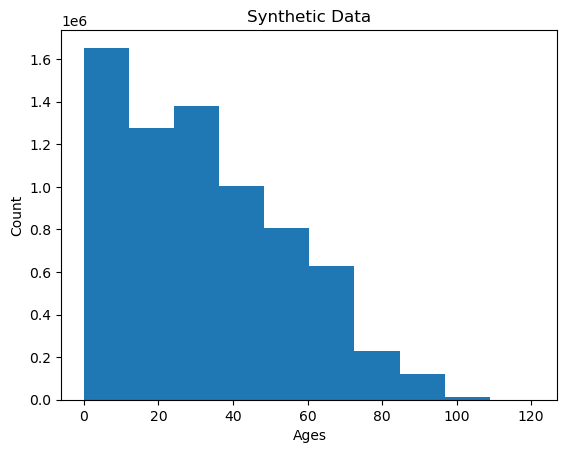

In [14]:
# Age histogram

plt.hist(df_ServiceRecordsSynthetic['age'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Ages')

In [15]:
barchartMunicipality = df_Municipality['population_name'].value_counts()



In [16]:
barchartMunicipality.head()

Total Population                                     8646
Children Under 18                                    2358
Individuals 15 and Over                              2358
Adults 18 and Over                                    786
Households with One or More People Under 18 Years     786
Name: population_name, dtype: int64

<Axes: title={'center': 'Municipality Ages Bar Chart'}>

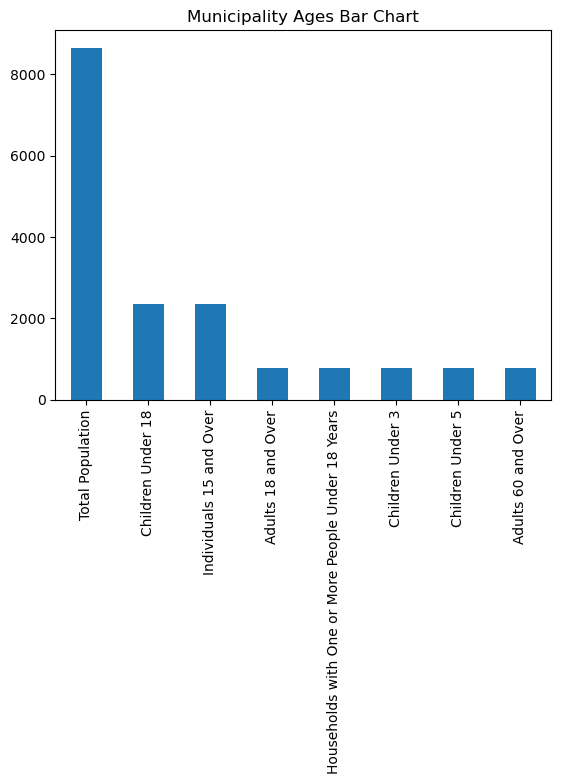

In [17]:
BarChart_Municipality = df_Municipality['population_name'].value_counts().reset_index().rename(columns={'Index': 'Population'})
dfBarChart_Municipality = BarChart_Municipality.columns = ['Population', 'Count']

barchartMunicipality.plot(x= 'Population', y =['Count'], kind = 'bar', title = 'Municipality Ages Bar Chart')


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, '1~White'),
  Text(1, 0, '99~Unknown'),
  Text(2, 0, '2~Black/African American'),
  Text(3, 0, '4~Asian'),
  Text(4, 0, '7~Other Single Race'),
  Text(5, 0, '6~Two or More Races'),
  Text(6, 0, '5~Native American/Pacific Islander')])

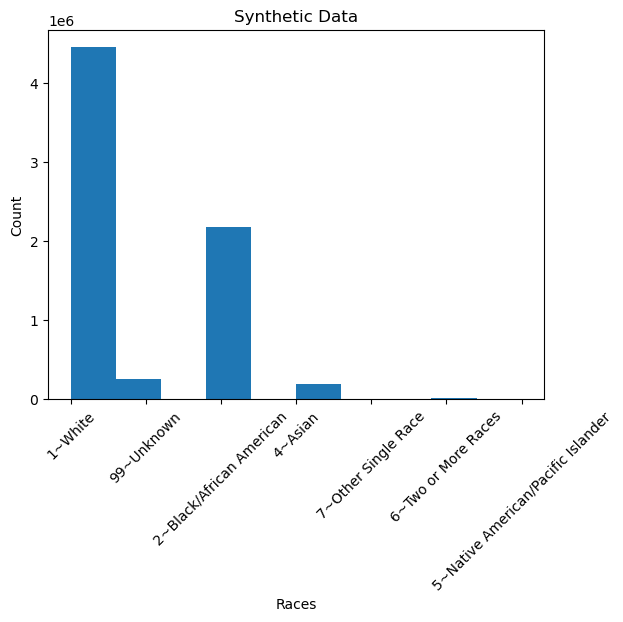

In [18]:
# Race histogram

plt.hist(df_ServiceRecordsSynthetic['RACE'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Races')
plt.xticks(rotation=45)

Text(0.5, 0, 'Races')

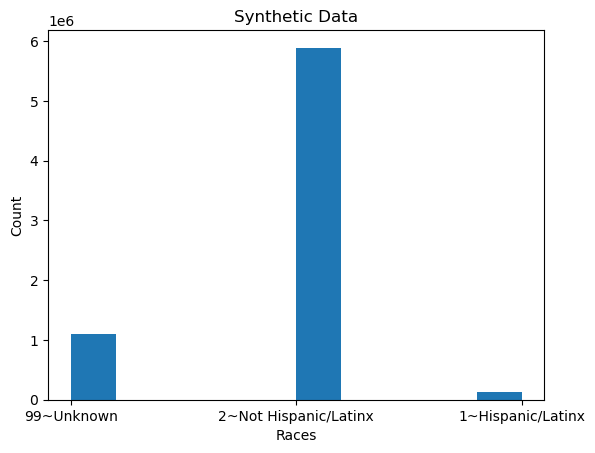

In [19]:
# Ethnicity histogram

plt.hist(df_ServiceRecordsSynthetic['ETHNICITY'])
plt.title('Synthetic Data')
plt.ylabel('Count')
plt.xlabel('Races')
#plt.xticks(rotation=45)

In [20]:
# Synthetic Data can give a very general overview 


df_ServiceRecordsSynthetic1 = pd.read_csv(ServiceRecords, usecols = ['CALDR_YR','service','GEO_AREA','age','DOD','GENDER','RACE','ETHNICITY'])
df_ServiceRecordsSynthetic1.isna().sum()

# This shows that every value that in terms of location is missing, so it would be hard to determine where to allocate resources using synthetic data


CALDR_YR           0
service            0
GEO_AREA     7116134
age                0
DOD          7116134
GENDER             0
RACE               0
ETHNICITY          0
dtype: int64

In [21]:
#df_Municipality.head()

df_Municipality['geo_area_name'].value_counts()

Aleppo                132
Scott                 132
Ross                  132
Robinson              132
Richland              132
                     ... 
Etna                  132
Emsworth              132
Elizabeth Township    132
Elizabeth Borough     132
X-Unassigned          132
Name: geo_area_name, Length: 131, dtype: int64

In [22]:
df_Municipality.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name,population_name,kpi_population
0,559714,Overdoses,Community Trends,2017.0,NaN,Aleppo,Total Population,1849.0
1,559715,Overdoses,Community Trends,2018.0,NaN,Aleppo,Total Population,1849.0
2,559716,Overdoses,Community Trends,2019.0,NaN,Aleppo,Total Population,1849.0
3,559717,Overdoses,Community Trends,2020.0,NaN,Aleppo,Total Population,1849.0
4,559718,Overdoses,Community Trends,2021.0,NaN,Aleppo,Total Population,1849.0


In [23]:
# Figure out what areas need the most help based on raw data - unable to do this with synthetic

df_Municipality.groupby(['geo_area_name']).max()

,_id,metric_name,report_group,calendar_year,kpi_count,population_name,kpi_population
geo_area_name,,,,,,,
Aleppo,576225,Suicides,Population Served by DHS,2022.0,219.0,Total Population,1849.0
Aspinwall,576231,Suicides,Population Served by DHS,2022.0,437.0,Total Population,2874.0
Avalon,576237,Suicides,Population Served by DHS,2022.0,1651.0,Total Population,4826.0
Baldwin Borough,576243,Suicides,Population Served by DHS,2022.0,6389.0,Total Population,20349.0
Baldwin Township,576249,Suicides,Population Served by DHS,2022.0,405.0,Total Population,2114.0
...,...,...,...,...,...,...,...
Whitehall,576981,Suicides,Population Served by DHS,2022.0,3800.0,Total Population,14396.0
Wilkins,576987,Suicides,Population Served by DHS,2022.0,1816.0,Total Population,6309.0
Wilkinsburg,576993,Suicides,Population Served by DHS,2022.0,7683.0,Total Population,15997.0


In [24]:

#df_Municipality.groupby(['metric_name']).sort_values(by = ['geo_area_name'], ascending = False)

idx = df_Municipality.groupby('metric_name')['kpi_count'].idxmax()
print(idx)

#Oldest_to_youngest2 = Overdoses_deeperlook.sort_values(by = 'age', ascending = False)
#print(Oldest_to_youngest2.head(5))
#print(Oldest_to_youngest2.tail(5))

metric_name
Children Attending Early Childhood Programs Managed by DHS    11532
Children Receiving Child Welfare Services                      8389
Children Receiving DHS-Funded Out of School Programs          12320
Children Receiving Early Intervention Services                11002
Children in Care                                               2100
Families Receiving Child Welfare Services                      9961
Homeless Population                                            4458
Homicides                                                      6034
Individuals Receiving DHS Services                             7602
Individuals Receiving Family Strengthening Programs           13105
Individuals Receiving Homelessness and Housing Services       16252
Individuals Receiving Income Supports                          7073
Individuals Receiving Intellectual Disability Services        13895
Individuals Receiving Mental Health Services                  14676
Individuals Receiving Substance Use 

In [25]:
# Finding the township that needs the most help in each category, maybe go back and determine a ratio or filter to get other townships besides pittsburgh 
# Could group by year in the future as well

idx = df_Municipality.groupby('metric_name')['kpi_count'].idxmax()
township_most_help = df_Municipality.loc[idx]

Help = township_most_help[['metric_name', 'population_name','geo_area_name']]
print(Help)


                                             metric_name  \
11532  Children Attending Early Childhood Programs Ma...   
8389           Children Receiving Child Welfare Services   
12320  Children Receiving DHS-Funded Out of School Pr...   
11002     Children Receiving Early Intervention Services   
2100                                    Children in Care   
9961           Families Receiving Child Welfare Services   
4458                                 Homeless Population   
6034                                           Homicides   
7602                  Individuals Receiving DHS Services   
13105  Individuals Receiving Family Strengthening Pro...   
16252  Individuals Receiving Homelessness and Housing...   
7073               Individuals Receiving Income Supports   
13895  Individuals Receiving Intellectual Disability ...   
14676       Individuals Receiving Mental Health Services   
15464  Individuals Receiving Substance Use Disorder S...   
3673                             Involun

In [26]:
df_Neighborhoods.isna().sum()

_id                 0
metric_name         0
report_group        0
calendar_year       0
kpi_count        4213
geo_area_name       0
dtype: int64

In [27]:
df_Neighborhoods1 = df_Neighborhoods.fillna(0)
df_Neighborhoods1.head()

,_id,metric_name,report_group,calendar_year,kpi_count,geo_area_name
0,370459,Overdoses,Community Trends,2018,0.0,Allegheny Center
1,370460,Overdoses,Community Trends,2019,0.0,Allegheny Center
2,370461,Overdoses,Community Trends,2020,0.0,Allegheny Center
3,370462,Overdoses,Community Trends,2021,0.0,Allegheny Center
4,370463,Overdoses,Community Trends,2022,0.0,Allegheny Center


In [28]:
# Finding the Neighborhood in Pittsburgh that needs the most help in each respective category
# Can't use synthetic data to find this answer

idx1 = df_Neighborhoods1.groupby('metric_name')['kpi_count'].idxmax()
township_most_help = df_Municipality.loc[idx1]

Help = township_most_help[['metric_name', 'population_name','geo_area_name']]
print(Help)

                                             metric_name  \
7243                  Individuals Receiving DHS Services   
7717                  Individuals Receiving DHS Services   
6749               Individuals Receiving Income Supports   
5352                                     Jail Population   
1266                                            Suicides   
6287                                           Homicides   
2738                                Mental Health Crises   
3932                                 Homeless Population   
4809                                     Jail Population   
8154           Children Receiving Child Welfare Services   
10156          Families Receiving Child Welfare Services   
4265                                 Homeless Population   
8535           Children Receiving Child Welfare Services   
9062            Parents Receiving Child Welfare Services   
9610           Families Receiving Child Welfare Services   
2165                                    

## How consistent are the aggregates from synthetic data with those reported by the county?
### About the data


### Actions taken

<Axes: xlabel='Service'>

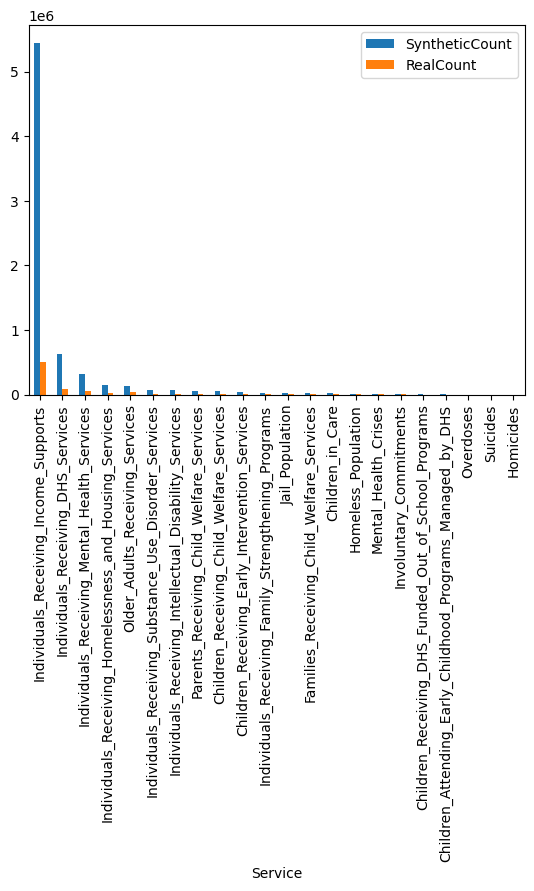

In [29]:
# Comparision of the Data Sets


#Compare.SyntheticCount.plot(kind='bar', color='red', ax=ax, width=width, position = 1)
#Compare.RealCount.plot(kind='bar', color='blue', ax=ax2, width=width, position = 0)

# Plot Graph

Compare.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')


In [30]:
# Dropping the first row from the dataframe, so graph easier to look at

Compare.head()
Row1 = Compare['Service'] == 'Individuals_Receiving_Income_Supports'
Compare1 = Compare[~Row1]
Compare1.head()


,Service,SyntheticCount,RealCount
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663
5,Individuals_Receiving_Substance_Use_Disorder_S...,74737,14094


Text(0, 0.5, 'Total Count')

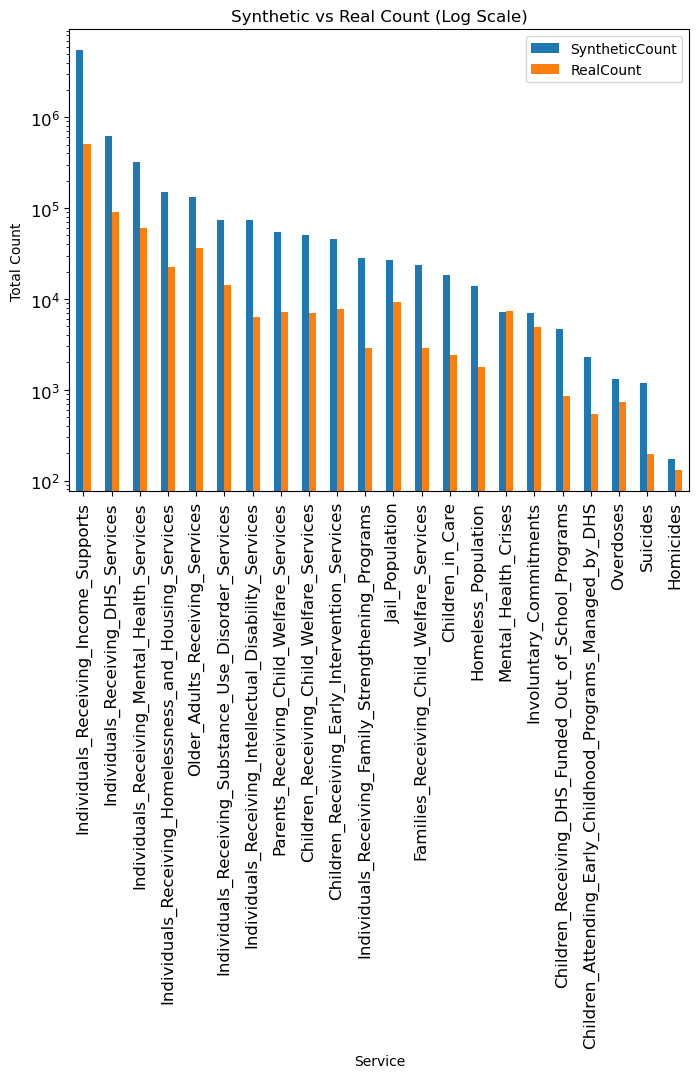

In [31]:
# Testing with Log Scale

ax = Compare.plot( x = 'Service', y= ['SyntheticCount', 'RealCount'], kind = 'bar', figsize=(8,6), title = 'Synthetic vs Real Count (Log Scale)', logy=True, fontsize=12)
ax.set_ylabel('Total Count')

<Axes: xlabel='Service'>

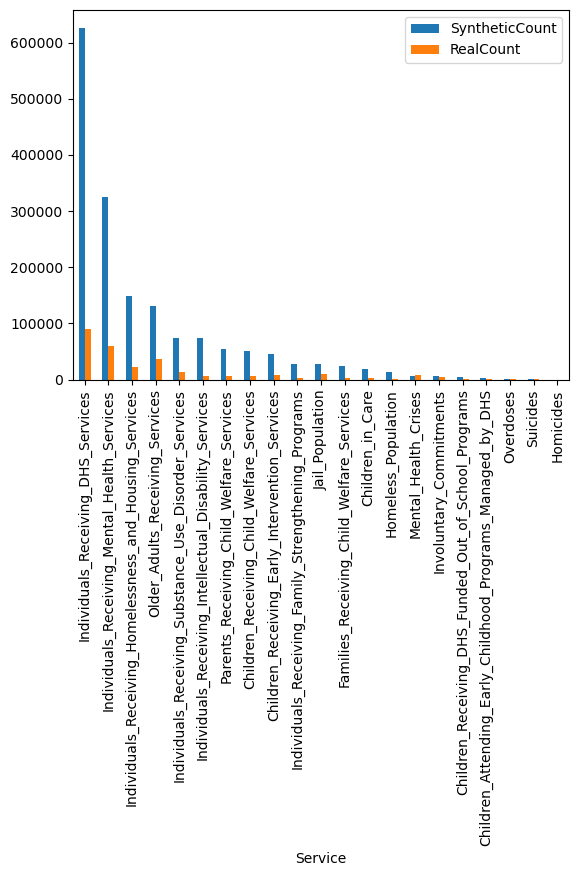

In [32]:
# Plotting without the first row to see what the true comparison of the data

# Plotting bar Graph

Compare1.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')

# Synthetic Data is overshooting by a lot


Text(0, 0.5, 'Total Count')

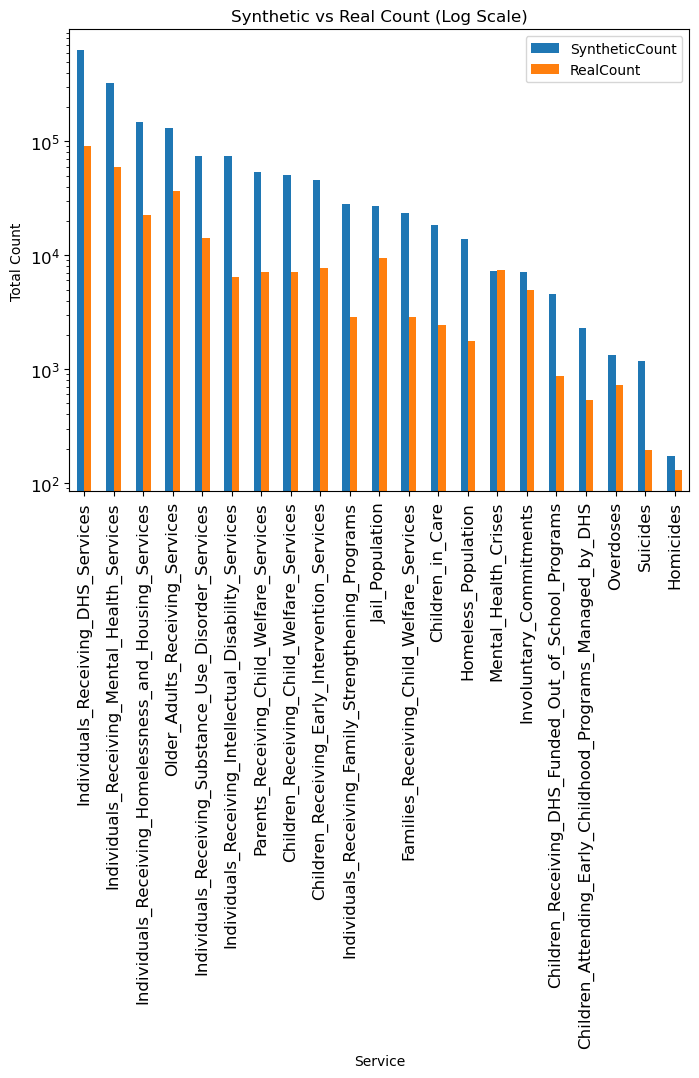

In [33]:
# Testing with Log Scale

ax = Compare1.plot( x = 'Service', y= ['SyntheticCount', 'RealCount'], kind = 'bar', figsize=(8,6), title = 'Synthetic vs Real Count (Log Scale)', logy=True, fontsize=12)
ax.set_ylabel('Total Count')

In [34]:
Compare.head()

,Service,SyntheticCount,RealCount
0,Individuals_Receiving_Income_Supports,5450993,506910
1,Individuals_Receiving_DHS_Services,626722,90346
2,Individuals_Receiving_Mental_Health_Services,324241,59958
3,Individuals_Receiving_Homelessness_and_Housing...,148968,22618
4,Older_Adults_Receiving_Services,131153,36663


(array([-2.5,  0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5]),
 [Text(-2.5, 0, ''),
  Text(0.0, 0, 'Individuals_Receiving_DHS_Services'),
  Text(2.5, 0, ''),
  Text(5.0, 0, 'Individuals_Receiving_Intellectual_Disability_Services'),
  Text(7.5, 0, ''),
  Text(10.0, 0, 'Jail_Population'),
  Text(12.5, 0, ''),
  Text(15.0, 0, 'Involuntary_Commitments'),
  Text(17.5, 0, ''),
  Text(20.0, 0, 'Homicides'),
  Text(22.5, 0, '')])

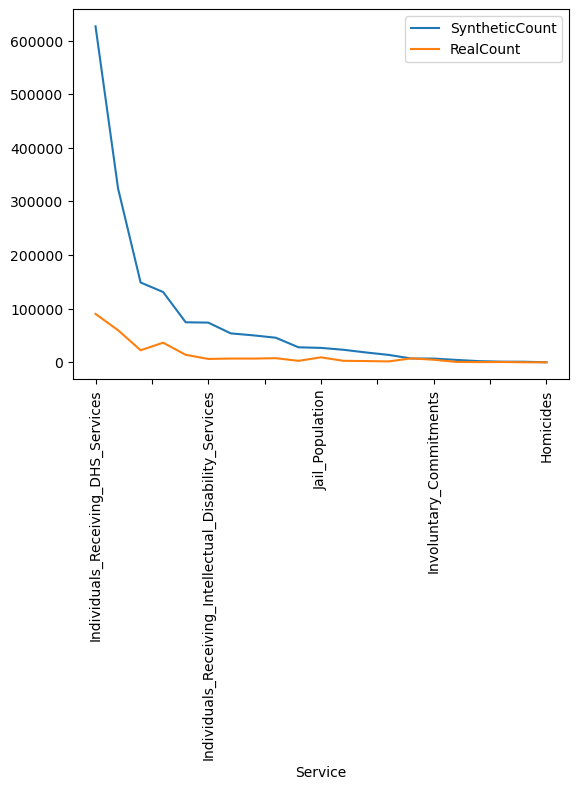

In [35]:
# Basic Line Plot

Compare1.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'line')
plt.xticks(rotation=90)


# Relatively similar in comparison to each other, Based on this data would still know where and how to allocate resources

## What is the underlying procedure for generating the synthetic datasets? 
### About the data


### Actions taken

In [38]:
fake.name()

'Michael Reyes'

In [2]:
# Synthetic data
SyntheticTry = '../../data-for-good/Project1/SyntheticTry.csv'
df_SyntheticTry = pd.read_csv(SyntheticTry, usecols = ['Name', 'Age', 'Weight'])
df_SyntheticTry.head()

,Name,Age,Weight
0,Jack Kaye,56,205
1,Andrew Fox,22,190
2,Declan Kelly,34,85
3,Nicole Martin,23,140
4,Lindsay Baker,45,135


(array([ 2.,  1., 11.,  4.,  0.,  3.,  4.,  1.,  1.,  2.]),
 array([ 8., 15., 22., 29., 36., 43., 50., 57., 64., 71., 78.]),
 <BarContainer object of 10 artists>)

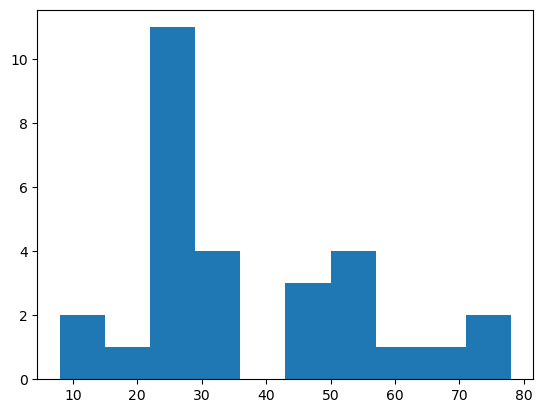

In [40]:
plt.hist(df_SyntheticTry['Age'])

In [3]:
# Since the p-value is greater than .15 and for the purposes of the example the data is normally distributed

from scipy.stats import normaltest
s,p=normaltest(df_SyntheticTry['Age'])
print('The p-value of the test is', p)

The p-value of the test is 0.25374346025384853


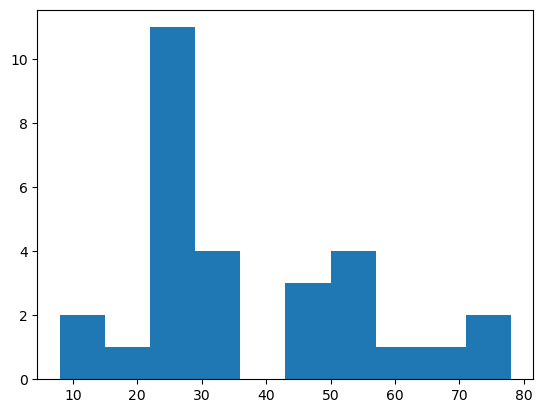

In [42]:
ax = plt.hist(df_SyntheticTry['Age'])

In [13]:
#check if the data is normally distributed - it isn't for any of the loan types (because p<0.05), can also see via histograms
#t test is ok even though data is not normally distributed because the sample is large
from scipy.stats import normaltest
s,p=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'])
print('Loan P: p=',p)
s,p1=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'])
print('Loan N: p=',p)
s,p2=normaltest(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'])
print('Loan C: p=',p)
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'P'])
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'N'])
# plt.hist(selected_df['Residual Error'][df['LOAN_PURPOSE'] == 'C'])

NameError: name 'selected_df' is not defined

37.310344827586206
18.270005567822793
[78.         77.29292929 76.58585859 75.87878788 75.17171717 74.46464646
 73.75757576 73.05050505 72.34343434 71.63636364 70.92929293 70.22222222
 69.51515152 68.80808081 68.1010101  67.39393939 66.68686869 65.97979798
 65.27272727 64.56565657 63.85858586 63.15151515 62.44444444 61.73737374
 61.03030303 60.32323232 59.61616162 58.90909091 58.2020202  57.49494949
 56.78787879 56.08080808 55.37373737 54.66666667 53.95959596 53.25252525
 52.54545455 51.83838384 51.13131313 50.42424242 49.71717172 49.01010101
 48.3030303  47.5959596  46.88888889 46.18181818 45.47474747 44.76767677
 44.06060606 43.35353535 42.64646465 41.93939394 41.23232323 40.52525253
 39.81818182 39.11111111 38.4040404  37.6969697  36.98989899 36.28282828
 35.57575758 34.86868687 34.16161616 33.45454545 32.74747475 32.04040404
 31.33333333 30.62626263 29.91919192 29.21212121 28.50505051 27.7979798
 27.09090909 26.38383838 25.67676768 24.96969697 24.26262626 23.55555556
 22.84848485 2

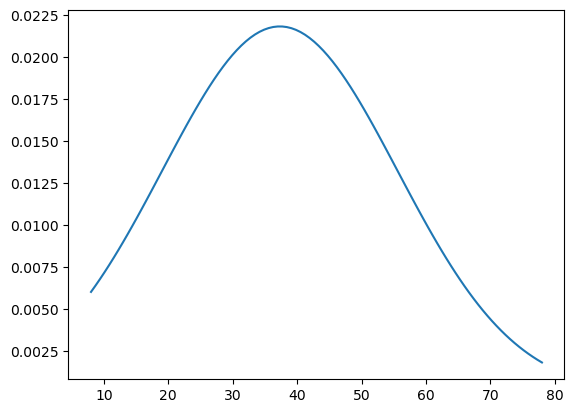

In [4]:
#Compare.SyntheticCount.plot(kind='bar', color='red', ax=ax, width=width, position = 1)
#Compare.RealCount.plot(kind='bar', color='blue', ax=ax2, width=width, position = 0)

import statistics
from scipy.stats import norm


m = statistics.mean(df_SyntheticTry['Age'])
sd = statistics.stdev(df_SyntheticTry['Age'])
print(m)
print(sd)

m1 = df_SyntheticTry['Age'].max()
m2 = df_SyntheticTry['Age'].min()

x_axis = np.linspace(m1, m2, 100)
print(x_axis)
plt.plot(x_axis, norm.pdf(x_axis, m, sd))
#plt.hist(df_SyntheticTry['Age'])



In [5]:
random_numbers = np.random.normal(loc = m, scale = sd, size = 30)
print(random_numbers)
SyntheticMade=random_numbers.T


[59.69980873 26.53338273 56.08859035 16.57551201 -0.98506899 14.97070463
 24.29163119 44.64486569 54.67122877 47.53943112 54.96508653 16.32672519
 14.61749234 45.57785412 63.52213643 69.06572478 59.23849573 24.72444257
 23.39039206 40.68505    61.4793008  52.89418684 29.39028345 44.39980893
 40.19555901 54.38145587 59.20717068 49.84308637 50.52993902 38.63602782]


In [6]:
predictors = df_SyntheticTry['Age']
target = df_SyntheticTry['Weight']

In [7]:
#split data into training set and test set
x_train, x_test, y_train, y_test =  train_test_split(predictors,target,test_size = 0.3)

In [11]:
print(np.array(x_train).reshape(1,-1))

[[25 67 78 62 27 27 19 24 53 34 56 25 33  8 24 49 23 28 34 72]]


In [13]:
linreg = LinearRegression()

linreg.fit(np.array(x_train).reshape(1,-1), np.array(y_train).reshape(1,-1))
#y_pred = linreg.predict(x_test)


LinearRegression()

In [14]:
linreg.intercept_

array([185., 210., 175., 150., 215., 150., 132., 190., 230., 120., 205.,
       210., 165.,  80., 140., 245., 215., 215.,  85., 145.])

In [15]:
num = random.uniform(8,78)

In [16]:
print(num)

49.84528723372427


In [17]:
print(df_SyntheticTry.mean())
print(df_SyntheticTry.max())
print(df_SyntheticTry.min())

Age        37.310345
Weight    174.724138
dtype: float64
Name      max
Age        78
Weight    250
dtype: object
Name      Andrew Fox
Age                8
Weight            80
dtype: object


C:\Users\decla\AppData\Local\Temp\ipykernel_21996\200795286.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_SyntheticTry.mean())


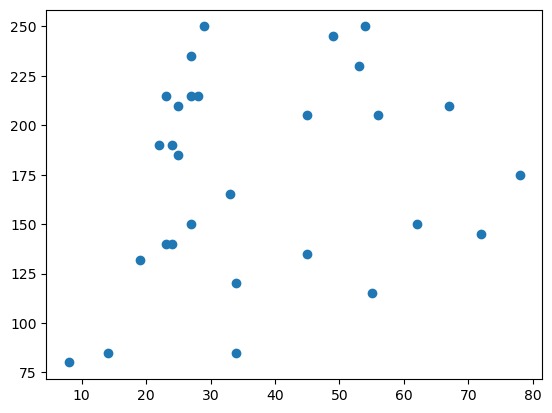

In [18]:
plt.scatter(df_SyntheticTry['Age'], df_SyntheticTry['Weight'])

In [23]:
df_SyntheticTry.Person.dropna().unique()

array(['Jack Kaye', 'Andrew Fox', 'Declan Kelly', 'Nicole Martin',
       'Lindsay Baker', 'Morgan Thomas', 'Jill Davies'], dtype=object)

(array([1., 0., 0., 0., 1., 1., 0., 3., 0., 1.]),
 array([ 8. ,  9.7, 11.4, 13.1, 14.8, 16.5, 18.2, 19.9, 21.6, 23.3, 25. ]),
 <BarContainer object of 10 artists>)

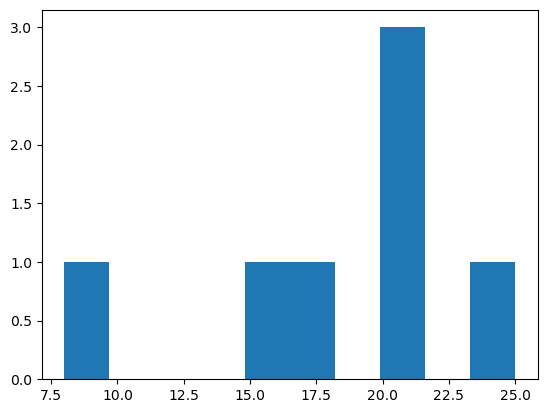

In [38]:
plt.hist(df_SyntheticTry['PeopleInFamily'])

## Are you convinced of its utility and privacy guarantees that it provide to individuals? 
### About the data


### Actions taken

In [36]:
# Going to focus in on Suicides, Overdoses, and Homicides in all of Alleghany County since they have the smallest value and that might be where we can predict the most
# This is our way for testing if Synthetic Data is protecting people's privacy


SHO_Compare = Compare[(Compare['Service'] == 'Suicides') | (Compare['Service'] == 'Homicides') | (Compare['Service'] == 'Overdoses')] 
SHO_Compare

,Service,SyntheticCount,RealCount
19,Overdoses,1319,724
20,Suicides,1177,197
21,Homicides,172,129


<Axes: xlabel='Service'>

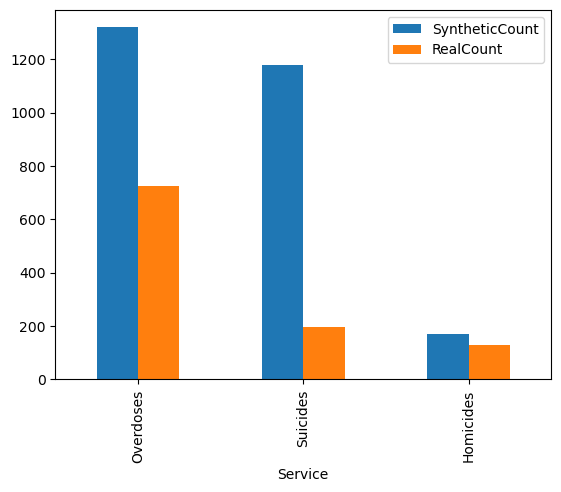

In [37]:
SHO_Compare.plot(x= 'Service', y =['SyntheticCount', 'RealCount'], kind = 'bar')

In [38]:
# Looking deeper into Synthetic Data

df_ServiceRecordsSynthetic.isna().sum() 

# There is no blank values

MCI_UNIQ_ID            0
CALDR_YR               0
DATE_OF_EVENT          0
service                0
GEO_AREA         7116134
age                    0
DOB              7116134
DOD              7116134
GENDER                 0
RACE                   0
ETHNICITY              0
dtype: int64

In [39]:
# New Synthetic Data frame of 
SHO_deeperlook = df_ServiceRecordsSynthetic[(df_ServiceRecordsSynthetic['service'] == 'Suicides') | (df_ServiceRecordsSynthetic['service'] == 'Homicides') | (df_ServiceRecordsSynthetic['service'] == 'Overdoses')] 


In [40]:
SHO_deeperlook.head()
year = SHO_deeperlook['CALDR_YR']
year.max()
year.min()
# All values in Synthetic data correspond to 2021


2021

In [41]:
# Breaking down each dataframe into type of the service

SHO_deeperlook.head()
Suicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Suicides')]
Homicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Homicides')]
Overdoses_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Overdoses')]

Text(0.5, 0, 'Ages')

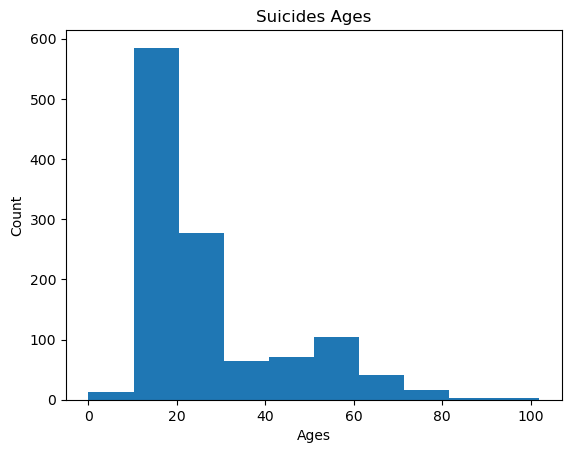

In [42]:
# Suicides 

#Suicides_deeperlook.head()

plt.hist(Suicides_deeperlook['age'])
plt.title('Suicides Ages')
plt.ylabel('Count')
plt.xlabel('Ages')

In [43]:
# Figuring out what the min/max value is 

Suicides_deeperlook.max()
Suicides_deeperlook.min()


MCI_UNIQ_ID                    730
CALDR_YR                      2021
DATE_OF_EVENT           01/31/2021
service                   Suicides
GEO_AREA                       NaN
age                              0
DOB                            NaN
DOD                            NaN
GENDER                      1~Male
RACE                       1~White
ETHNICITY        1~Hispanic/Latinx
dtype: object

In [44]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest = Suicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest.head(5))
print(Oldest_to_youngest.tail(5))


         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115331       172184      2021    09/30/2021  Suicides       NaN  102  NaN   
7115614       296899      2021    06/30/2021  Suicides       NaN   99  NaN   
7115598       291171      2021    04/30/2021  Suicides       NaN   98  NaN   
7115776       371341      2021    09/30/2021  Suicides       NaN   91  NaN   
7115407       204296      2021    03/31/2021  Suicides       NaN   91  NaN   

         DOD    GENDER                      RACE              ETHNICITY  
7115331  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
7115614  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7115598  NaN    1~Male                   1~White             99~Unknown  
7115776  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7115407  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx  
         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115694  

In [45]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest = Suicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest.head(5))
print(Oldest_to_youngest.tail(5))



         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115331       172184      2021    09/30/2021  Suicides       NaN  102  NaN   
7115614       296899      2021    06/30/2021  Suicides       NaN   99  NaN   
7115598       291171      2021    04/30/2021  Suicides       NaN   98  NaN   
7115776       371341      2021    09/30/2021  Suicides       NaN   91  NaN   
7115407       204296      2021    03/31/2021  Suicides       NaN   91  NaN   

         DOD    GENDER                      RACE              ETHNICITY  
7115331  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
7115614  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7115598  NaN    1~Male                   1~White             99~Unknown  
7115776  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7115407  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx  
         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT   service  GEO_AREA  age  DOB  \
7115694  

In [46]:
#Suicides_deeperlook = SHO_deeperlook[(SHO_deeperlook['service'] == 'Suicides')]

Suicides_extremeAges = Suicides_deeperlook[(Suicides_deeperlook['age']>=80) | (Suicides_deeperlook['age']<=10)]
Suicides_extremeAges.describe()


,MCI_UNIQ_ID,CALDR_YR,GEO_AREA,age,DOB,DOD
count,22.000000,22.0,0.0,22.000000,0.0,0.0
mean,282344.727273,2021.0,NaN,39.000000,NaN,NaN
std,119451.308939,0.0,NaN,43.385317,NaN,NaN
min,57517.000000,2021.0,NaN,0.000000,NaN,NaN
25%,182559.500000,2021.0,NaN,3.000000,NaN,NaN
50%,294035.000000,2021.0,NaN,8.000000,NaN,NaN
75%,387726.250000,2021.0,NaN,82.500000,NaN,NaN
max,485444.000000,2021.0,NaN,102.000000,NaN,NaN


Text(0, 0.5, 'Count')

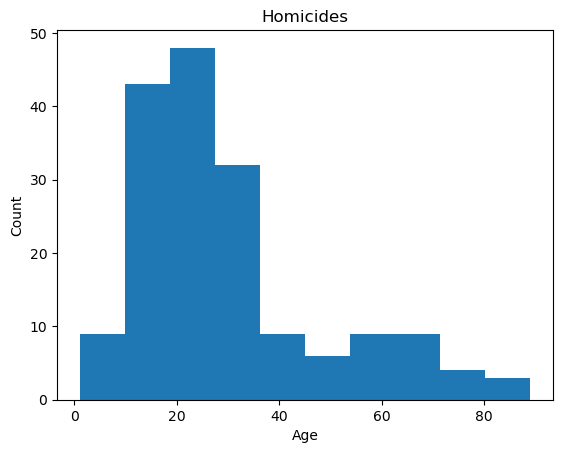

In [47]:
# Homicides

plt.hist(Homicides_deeperlook['age'])
plt.title('Homicides')
plt.xlabel('Age')
plt.ylabel('Count')

In [48]:
# Figuring out what the min/max value is 

Homicides_deeperlook.max()
Homicides_deeperlook.min()
# Youngest age 1, oldest 89

MCI_UNIQ_ID                   2650
CALDR_YR                      2021
DATE_OF_EVENT           01/31/2021
service                  Homicides
GEO_AREA                       NaN
age                              1
DOB                            NaN
DOD                            NaN
GENDER                      1~Male
RACE                       1~White
ETHNICITY        1~Hispanic/Latinx
dtype: object

In [49]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest1 = Homicides_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest1.head(5))
print(Oldest_to_youngest1.tail(5))


        MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
159131       231991      2021    04/30/2021  Homicides       NaN   89  NaN   
159214       444435      2021    08/31/2021  Homicides       NaN   87  NaN   
159168       352385      2021    12/31/2021  Homicides       NaN   87  NaN   
159198       406002      2021    12/31/2021  Homicides       NaN   79  NaN   
159207       421346      2021    06/30/2021  Homicides       NaN   77  NaN   

        DOD    GENDER                      RACE              ETHNICITY  
159131  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
159214  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx  
159168  NaN  2~Female  2~Black/African American  2~Not Hispanic/Latinx  
159198  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
159207  NaN  2~Female                99~Unknown  2~Not Hispanic/Latinx  
        MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
159187       38

Text(0.5, 0, 'Age')

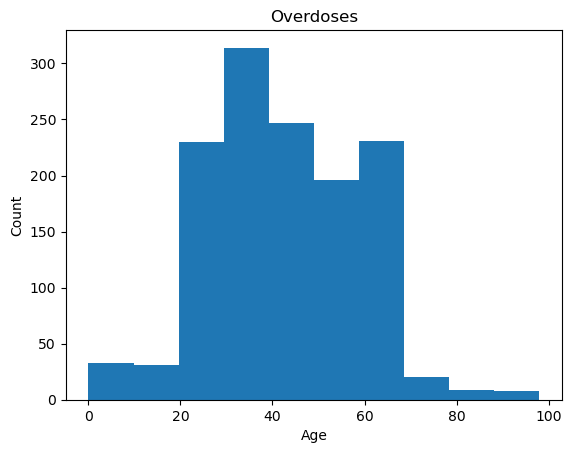

In [50]:
# Overdoses

plt.hist(Overdoses_deeperlook['age'])
plt.title('Overdoses')
plt.ylabel('Count')
plt.xlabel('Age')

In [51]:
# Figuring out what the min/max value is 

Overdoses_deeperlook.max()
Overdoses_deeperlook.min()
# Youngest age 1, oldest 89

MCI_UNIQ_ID                    272
CALDR_YR                      2021
DATE_OF_EVENT           01/31/2021
service                  Overdoses
GEO_AREA                       NaN
age                              0
DOB                            NaN
DOD                            NaN
GENDER                      1~Male
RACE                       1~White
ETHNICITY        1~Hispanic/Latinx
dtype: object

In [52]:
# Looking at the top and bottom of the dataset

Oldest_to_youngest2 = Overdoses_deeperlook.sort_values(by = 'age', ascending = False)
print(Oldest_to_youngest2.head(5))
print(Oldest_to_youngest2.tail(5))

         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
7059965       155989      2021    01/31/2021  Overdoses       NaN   98  NaN   
7060111       207995      2021    05/31/2021  Overdoses       NaN   94  NaN   
7059800        84567      2021    05/31/2021  Overdoses       NaN   94  NaN   
7059824        98274      2021    02/28/2021  Overdoses       NaN   93  NaN   
7059920       136477      2021    07/31/2021  Overdoses       NaN   92  NaN   

         DOD    GENDER                      RACE              ETHNICITY  
7059965  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7060111  NaN    1~Male                   1~White  2~Not Hispanic/Latinx  
7059800  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
7059824  NaN  2~Female                   1~White  2~Not Hispanic/Latinx  
7059920  NaN    1~Male  2~Black/African American  2~Not Hispanic/Latinx  
         MCI_UNIQ_ID  CALDR_YR DATE_OF_EVENT    service  GEO_AREA  age  DOB  \
70

In [53]:
# Deeper look at data - Need to figure out later how this helps

mytable = Suicides_deeperlook.groupby(['GENDER','RACE','ETHNICITY']).size()
print(mytable)

GENDER    RACE                      ETHNICITY            
1~Male    1~White                   1~Hispanic/Latinx          1
                                    2~Not Hispanic/Latinx    222
                                    99~Unknown               255
          2~Black/African American  2~Not Hispanic/Latinx      7
                                    99~Unknown                 3
          4~Asian                   2~Not Hispanic/Latinx     28
                                    99~Unknown                13
          7~Other Single Race       2~Not Hispanic/Latinx      1
          99~Unknown                2~Not Hispanic/Latinx      1
                                    99~Unknown                 1
2~Female  1~White                   1~Hispanic/Latinx          7
                                    2~Not Hispanic/Latinx    190
                                    99~Unknown               365
          2~Black/African American  2~Not Hispanic/Latinx      8
                                